# User Churn Prediction

In this project, we use supervised learning models to identify customers who are likely to stop using service in the future. Furthermore, we will analyze top factors that influence user retention.

## Contents

<ul>
<li>[Part 1: Data Exploration](#Part-1:-Data-Exploration)
<li>[Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
<li>[Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
<li>[Part 4: Feature Selection](#Part-4:-Feature-Selection)
<li>[Part 5: Use Probabilities as Prediction Results](#Part-5:-Use-Probabilities-as-Prediction-Results)
</ul>

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

<ul>
<li>Data Source: https://www.sgi.com/tech/mlc/db/churn.all
<li>Data info: https://www.sgi.com/tech/mlc/db/churn.names
</ul>


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('data/banking.csv')

In [3]:
churn_df.head(10)

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [4]:
print "Num of rows: " + str(churn_df.shape[0]) # row count
print "Num of columns: " + str(churn_df.shape[1]) # col count

Num of rows: 41188
Num of columns: 18


### Part 1.3:  Understand the features

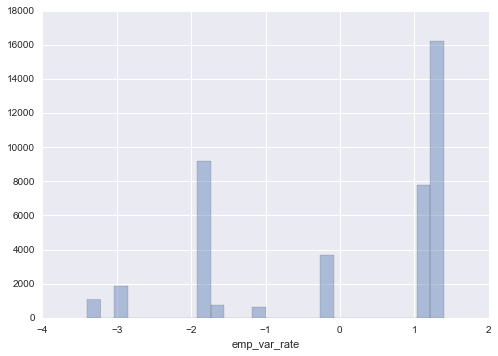

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(churn_df['emp_var_rate'], kde=False)

# Part 2: Feature Preprocessing

In [6]:
churn_df.head(10)

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


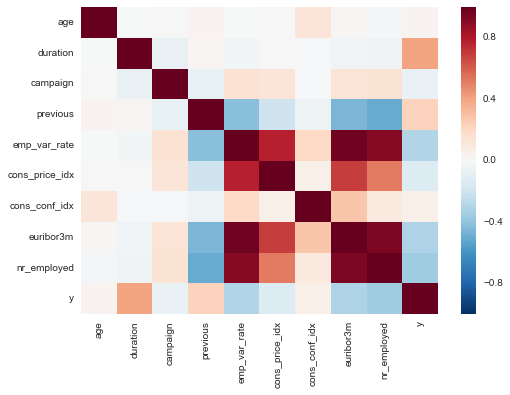

In [7]:
corr = churn_df[["age","duration","campaign","previous","emp_var_rate","cons_price_idx","cons_conf_idx","euribor3m","nr_employed","y"]].corr()
sb.heatmap(corr)

In [8]:
# Get ground truth data
y = np.where(churn_df['y'] == 1,1,0)

# Drop some useless columns
to_drop = ['duration','y']
churn_feat_space = churn_df.drop(to_drop, axis=1)

# yes and no have to be converted to boolean values
yes_no_cols = ["housing","loan","default"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'



In [9]:
# data processing for linear classifier

# categorical to dummy
df_marital=pd.get_dummies(churn_feat_space['marital'])
df_marital=df_marital.drop(['unknown'], axis=1)
df_job=pd.get_dummies(churn_feat_space['job'])
df_job=df_job.drop(['unknown'], axis=1)
df_edu=pd.get_dummies(churn_feat_space['education'])
df_edu=df_edu.drop(['unknown'], axis=1)
df_poutcome=pd.get_dummies(churn_feat_space['poutcome'])

# replacing categorical with dummy
churn_feat_space_linear = churn_feat_space.drop(['marital','job','education','poutcome'], axis=1)
churn_feat_space_linear = pd.concat([churn_feat_space_linear, df_marital, df_job, df_edu, df_poutcome],axis=1)

# Converts data frame to its Numpy-array representation.
X_linear = churn_feat_space_linear.as_matrix().astype(np.float)
#churn_feat_space.head()
churn_feat_space_linear.head()

,age,default,housing,loan,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,divorced,married,single,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,failure,nonexistent,success
0,44,False,True,False,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,53,False,False,False,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,False,True,False,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,39,False,False,False,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,55,False,True,False,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# data processing for non-linear classifier

# categorical to interger
churn_feat_space_nonlinear = churn_feat_space.copy()
churn_feat_space_nonlinear['marital'] = churn_feat_space_nonlinear['marital'].astype('category')
churn_feat_space_nonlinear['education'] = churn_feat_space_nonlinear['education'].astype('category')
churn_feat_space_nonlinear['poutcome'] = churn_feat_space_nonlinear['poutcome'].astype('category')
churn_feat_space_nonlinear['job'] = churn_feat_space_nonlinear['job'].astype('category')
cat_columns = churn_feat_space_nonlinear.select_dtypes(['category']).columns
churn_feat_space_nonlinear[cat_columns] = churn_feat_space_nonlinear[cat_columns].apply(lambda x: x.cat.codes)

# Converts data frame to its Numpy-array representation.
X_nonlinear = churn_feat_space_nonlinear.as_matrix().astype(np.float)
#churn_feat_space.head()
churn_feat_space_nonlinear.head()


,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,False,True,False,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1
1,53,9,1,7,False,False,False,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8
2,28,4,2,6,False,True,False,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,7,1,3,False,False,False,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
4,55,5,1,0,False,True,False,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2


In [11]:
churn_feat_space.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,False,True,False,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,False,False,False,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,False,True,False,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,False,False,False,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,False,True,False,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2


In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_linear = scaler.fit_transform(X_linear)
X_nonlinear = scaler.fit_transform(X_nonlinear)

print "Linear Feature space holds %d observations and %d features" % X_linear.shape
print "Non-Linear Feature space holds %d observations and %d features" % X_nonlinear.shape
print "Unique target labels:", np.unique(y)
print X_nonlinear


Linear Feature space holds 41188 observations and 36 features
Non-Linear Feature space holds 41188 observations and 16 features
Unique target labels: [0 1]
[[ 0.38152696 -0.75798228 -0.2837415  ...,  0.95126739  0.77357519
   0.84517009]
 [ 1.24515746  1.46762984 -0.2837415  ..., -0.32354233  0.23045613
   0.39811529]
 [-1.15381613  0.07662227  1.3585779  ...,  0.15181045 -1.66757776
  -2.42815683]
 ..., 
 [ 0.18960908 -1.03618379  1.3585779  ...,  0.88644656  0.71245988
   0.33167991]
 [ 0.76536274  1.46762984 -0.2837415  ...,  2.93910628 -1.66008249
  -2.06968255]
 [-1.44169297  1.18942833  1.3585779  ...,  0.88644656  0.713613
   0.33167991]]


# Part 3: Model Training and Result Evaluation

### Part 3.1: K-fold Cross-Validation

In [13]:
from sklearn.cross_validation import KFold

#This program does 5-fold. It saves the result at each time as different parts of y_pred. 
#In the end, it returns the y_pred as the result of all the five 5-fold.
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=10,shuffle=False)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Part 3.2: Run Supervised Learning Models and Calculate Accuracy

In [15]:
#Run Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

LR_CV_result = run_cv(X_linear,y,LogisticRegression)
RF_CV_result = run_cv(X_nonlinear,y,RandomForestClassifier)
KNN_CV_result = run_cv(X_linear,y,KNeighborsClassifier,n_neighbors=9) #Default: n_neighbors=5
DEC_CV_result = run_cv(X_nonlinear,y,DecisionTreeClassifier)
#SVC_CV_result = run_cv(X,y,SVC)
NB_CV_result = run_cv(X_linear,y,GaussianNB)
MLP_hidden_layer_sizes=11
MLP_CV_result = run_cv(X_nonlinear,y,MLPClassifier,hidden_layer_sizes=MLP_hidden_layer_sizes,activation='logistic')

print "Logistic Regression (L2 is default): " + str(accuracy(y, LR_CV_result))
print "Random forest: " + str(accuracy(y, RF_CV_result))
print "K-nearest-neighbors: " + str(accuracy(y, KNN_CV_result))
print "Decition Tree: " + str(accuracy(y, DEC_CV_result))
#print "SVC: " + str(accuracy(y, SVC_CV_result))
print "NB: " + str(accuracy(y, NB_CV_result))
print "MLP: " + str(accuracy(y, MLP_CV_result))


Logistic Regression (L2 is default): 0.898732640575
Random forest: 0.888584053608
K-nearest-neighbors: 0.892784306109
Decition Tree: 0.840269010391
NB: 0.506069729047
MLP: 0.899509565893


In [16]:
#MLP para selection
for MLP_hidden_layer_sizes in range(1,13):
    MLP_CV_result = run_cv(X_nonlinear,y,MLPClassifier,hidden_layer_sizes=MLP_hidden_layer_sizes,activation='tanh')
    print "MLP with " + str(MLP_hidden_layer_sizes) + " hidden layer size: " + str(accuracy(y, MLP_CV_result))
for MLP_hidden_layer_sizes in range(1,13):
    MLP_CV_result = run_cv(X_nonlinear,y,MLPClassifier,hidden_layer_sizes=MLP_hidden_layer_sizes,activation='logistic')
    print "MLP logistic with " + str(MLP_hidden_layer_sizes) + " hidden layer size: " + str(accuracy(y, MLP_CV_result))

MLP with 1 hidden layer size: 0.89710595319
MLP with 2 hidden layer size: 0.897251626687
MLP with 3 hidden layer size: 0.898247062251
MLP with 4 hidden layer size: 0.898198504419
MLP with 5 hidden layer size: 0.898999708653
MLP with 6 hidden layer size: 0.898465572497
MLP with 7 hidden layer size: 0.899121103234
MLP with 8 hidden layer size: 0.899072545402
MLP with 9 hidden layer size: 0.898514130329
MLP with 10 hidden layer size: 0.899072545402
MLP with 11 hidden layer size: 0.899193939983
MLP with 12 hidden layer size: 0.897979994173
MLP logistic with 1 hidden layer size: 0.889579489172
MLP logistic with 2 hidden layer size: 0.897203068855
MLP logistic with 3 hidden layer size: 0.897542973682
MLP logistic with 4 hidden layer size: 0.897931436341
MLP logistic with 5 hidden layer size: 0.898295620084
MLP logistic with 6 hidden layer size: 0.899218218899
MLP logistic with 7 hidden layer size: 0.899121103234
MLP logistic with 8 hidden layer size: 0.899363892396
MLP logistic with 9 hidden

In [25]:
#KNN para selection
for n_neighbors_number in range (1,30,2):
    KNN_CV_result = run_cv(X_linear,y,KNeighborsClassifier,n_neighbors=n_neighbors_number) #Default: n_neighbors=5
    print "K-nearest-neighbors with " + str(n_neighbors_number) + " neighbors: " + str(accuracy(y, KNN_CV_result))

K-nearest-neighbors with 1 neighbors: 0.844663494222
K-nearest-neighbors with 3 neighbors: 0.881081868505
K-nearest-neighbors with 5 neighbors: 0.889360978926
K-nearest-neighbors with 7 neighbors: 0.891910265126
K-nearest-neighbors with 9 neighbors: 0.892808585025
K-nearest-neighbors with 11 neighbors: 0.894071088667
K-nearest-neighbors with 13 neighbors: 0.894435272409
K-nearest-neighbors with 15 neighbors: 0.895236476644
K-nearest-neighbors with 17 neighbors: 0.895697776051
K-nearest-neighbors with 19 neighbors: 0.895867728465
K-nearest-neighbors with 21 neighbors: 0.8957706128
K-nearest-neighbors with 23 neighbors: 0.895989123046
K-nearest-neighbors with 25 neighbors: 0.896377585705
K-nearest-neighbors with 27 neighbors: 0.896717490531
K-nearest-neighbors with 29 neighbors: 0.897130232106


In [26]:
#KNN para selection
for n_neighbors_number in range (31,60,2):
    KNN_CV_result = run_cv(X_linear,y,KNeighborsClassifier,n_neighbors=n_neighbors_number) #Default: n_neighbors=5
    print "K-nearest-neighbors with " + str(n_neighbors_number) + " neighbors: " + str(accuracy(y, KNN_CV_result))

K-nearest-neighbors with 31 neighbors: 0.897494415849
K-nearest-neighbors with 33 neighbors: 0.897227347771
K-nearest-neighbors with 35 neighbors: 0.897251626687
K-nearest-neighbors with 37 neighbors: 0.897154511023
K-nearest-neighbors with 39 neighbors: 0.897445858017
K-nearest-neighbors with 41 neighbors: 0.897397300185
K-nearest-neighbors with 43 neighbors: 0.897640089346
K-nearest-neighbors with 45 neighbors: 0.897542973682
K-nearest-neighbors with 47 neighbors: 0.897591531514
K-nearest-neighbors with 49 neighbors: 0.897737205011
K-nearest-neighbors with 51 neighbors: 0.897664368263
K-nearest-neighbors with 53 neighbors: 0.897421579101
K-nearest-neighbors with 55 neighbors: 0.89761581043
K-nearest-neighbors with 57 neighbors: 0.897785762844
K-nearest-neighbors with 59 neighbors: 0.897591531514


In [16]:
#Get Feature Ranking for NN model ( Best_MLP_Model )
MLP_hidden_layer_sizes=11
Best_MLP_Model=MLPClassifier(hidden_layer_sizes=MLP_hidden_layer_sizes,activation='tanh')
Best_MLP_Model.fit(X_nonlinear,y)
MLP_coef=[]
for j in range(0,X_nonlinear.shape[1]):
    temp=0
    for i in range(0,MLP_hidden_layer_sizes):
        temp=temp+Best_MLP_Model.coefs_[0][j][i]*Best_MLP_Model.coefs_[1][i][0]
    MLP_coef.append(temp)
#for k in range(0,X.shape[1]):
#    print churn_feat_space.columns.values[k] +':\t\t'+ str(MLP_coef[k])
MLR_feature_coef = dict(zip(churn_feat_space.columns.values,MLP_coef))
MLR_feature_coef_sorted = sorted(MLR_feature_coef.items(), key=lambda x: abs(x[1]))
for item in MLR_feature_coef_sorted:
    print item[0]+':\t\t'+str(item[1])

loan:		-0.00150814539729
marital:		0.0256171901038
job:		-0.0310665552281
housing:		0.0348549046699
cons_conf_idx:		-0.0370899583679
age:		-0.0969980868391
poutcome:		0.101136842931
previous:		0.138195765514
education:		0.25173458019
campaign:		-0.471900664579
cons_price_idx:		0.509072905282
pdays:		-0.635856428572
euribor3m:		0.76307535199
nr_employed:		-0.765955752876
emp_var_rate:		-1.71999689657
default:		2.49240238109


In [17]:
#Show the details of prediction results
churn_df_result = churn_df
churn_df_result['LR_Result'] = LR_CV_result == 1
churn_df_result['RF_Result'] = RF_CV_result == 1
churn_df_result['KNN_Result'] = KNN_CV_result == 1
churn_df_result['DC_Result'] = DEC_CV_result == 1
#churn_df_result['SVC_Result'] = SVC_CV_result == 1
churn_df_result['NB_Result'] = NB_CV_result == 1
churn_df_result['MLP_Result'] = MLP_CV_result == 1
churn_df_result[churn_df_result.columns[-7:]].head(10)

,y,LR_Result,RF_Result,KNN_Result,DC_Result,NB_Result,MLP_Result
0,0,False,False,False,False,False,False
1,0,False,False,False,False,True,False
2,1,True,True,True,True,True,True
3,0,False,False,False,False,True,False
4,1,True,False,True,False,True,True
5,0,False,False,False,False,False,False
6,0,False,False,False,False,True,False
7,0,False,False,False,False,True,False
8,1,True,True,True,False,True,True
9,0,False,False,False,False,True,False


### (Optional) Part 3.3: Use Grid Search to Find Optimal Parameters

#### Part 3.3.1: Find Optimal Parameters - LogisticRegression

In [18]:
def print_grid_search_metrics(gs):
    print "Best score: %0.3f" % gs.best_score_
    print "Best parameters set:"
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [19]:
from sklearn.grid_search import GridSearchCV
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5, verbose=1, refit=False)
Grid_LR.fit(X_linear, y)

//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   40.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=False, scoring=None, verbose=1)

In [20]:
print_grid_search_metrics(Grid_LR)

Best score: 0.899
Best parameters set:
	C: 5
	penalty: 'l1'


In [21]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(LogisticRegression(C=1,penalty='l1'), X_linear, y, cv=5)
print "Logistic Regression 5-fold cross validation accuracy: " + str(np.mean(score))

Logistic Regression 5-fold cross validation accuracy: 0.89890255903


#### Part 3.3.2: Find Optimal Parameters: KNN

In [22]:
from sklearn.grid_search import GridSearchCV
parameters = {
    'n_neighbors':[3,5,7,9] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5, verbose=1, refit=False)
Grid_KNN.fit(X_linear, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
       refit=False, scoring=None, verbose=1)

In [23]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.893
Best parameters set:
	n_neighbors: 9


In [24]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(KNeighborsClassifier(n_neighbors=5),X_linear,y,cv=5)
print "5-fold cross validation accuracy: " + str(np.mean(score))

5-fold cross validation accuracy: 0.889215287942


#### Part 3.3.3: Find Optimal Parameters: MLP

In [17]:
parameters = {
    'hidden_layer_sizes':[12,18,24,30]
}
Grid_MLP = GridSearchCV(MLPClassifier(activation='tanh'),parameters, cv=5, verbose=1, refit=False)
Grid_MLP.fit(X_nonlinear,y)
print_grid_search_metrics(Grid_MLP)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score: 0.897
Best parameters set:
	hidden_layer_sizes: 12


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.5min finished


### Part 3.4: Calculate Confusion Matrix (Precision, Recall, Accuracy)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print classifier
    print "Accuracy is " + str(accuracy)
    print "Precision is " + str(precision)
    print "Recall is " + str(recall)

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ("Random Forest", confusion_matrix(y,RF_CV_result)),
    ("K-Nearest-Neighbors", confusion_matrix(y,KNN_CV_result)),
    ("Logisitic Regression", confusion_matrix(y,LR_CV_result))
]

Random Forest
Accuracy is 0.888584053608
Precision is 0.967877859254
Recall is 0.911959576169


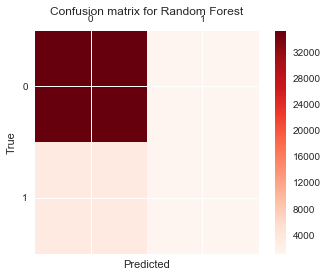

K-Nearest-Neighbors
Accuracy is 0.892784306109
Precision is 0.977180693882
Recall is 0.908845684039


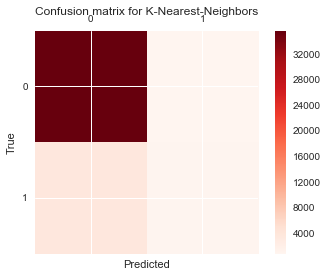

Logisitic Regression
Accuracy is 0.898732640575
Precision is 0.988836598446
Recall is 0.90569631356


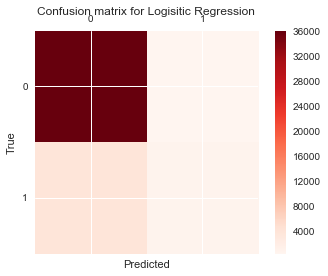

In [26]:
%matplotlib inline
draw_confusion_matrices(confusion_matrices,class_names)

# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).

#### Part 4.1.1 - Compare Feature Coefficients

In [27]:
LRmodel_l1 = LogisticRegression(penalty="l1")
LRmodel_l1.fit(X_linear, y)
LRmodel_l1.coef_[0]
print "Logistic Regression (L1) Coefficients"
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      churn_feat_space.columns), key=lambda (k,v):(-abs(k),v)):
    print v + ": " + str(k)

Logistic Regression (L1) Coefficients
campaign: -0.7461
emp_var_rate: -0.3449
pdays: 0.3104
housing: -0.2164
default: -0.1363
previous: 0.0834
nr_employed: 0.077
cons_conf_idx: -0.0552
cons_price_idx: -0.0455
poutcome: 0.0344
job: -0.0226
age: 0.0216
education: -0.0104
euribor3m: -0.0064
marital: -0.0041
loan: -0.0008


In [28]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X_linear, y)
LRmodel_l2.coef_[0]
print "Logistic Regression (L2) Coefficients"
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      churn_feat_space.columns), key=lambda (k,v):(-abs(k),v)):
    print v + ": " + str(k)

Logistic Regression (L2) Coefficients
campaign: -0.7537
emp_var_rate: -0.3549
pdays: 0.3086
housing: -0.2169
default: -0.1366
cons_conf_idx: -0.1268
nr_employed: 0.1012
cons_price_idx: -0.092
previous: 0.0809
euribor3m: -0.0722
poutcome: 0.0537
job: -0.037
age: 0.0221
education: -0.0106
marital: -0.0042
loan: -0.0016


#### Part 4.1.2 - Use Recursive Feature Elimination (RFE)

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [29]:
from sklearn.feature_selection import RFE

rfe_l1 = RFE(LRmodel_l1, n_features_to_select=1) # If None, half of the features are selected.
rfe_l1.fit(X_linear, y)
print "Logistic Regression (L1) RFE Result"
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l1.ranking_), churn_feat_space.columns)):
    print v + ": " + str(k)

Logistic Regression (L1) RFE Result
emp_var_rate: 1.0
housing: 2.0
campaign: 3.0
pdays: 4.0
default: 7.0
previous: 8.0
nr_employed: 12.0
cons_conf_idx: 16.0
cons_price_idx: 17.0
poutcome: 18.0
job: 22.0
age: 23.0
education: 31.0
euribor3m: 32.0
marital: 33.0
loan: 34.0


In [30]:
from sklearn.feature_selection import RFE
rfe_l2 = RFE(LRmodel_l2, n_features_to_select=1) # If None, half of the features are selected.
rfe_l2.fit(X_linear, y)
print "Logistic Regression (L2) RFE Result"
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l2.ranking_), churn_feat_space.columns)):
    print v + ": " + str(k)

Logistic Regression (L2) RFE Result
emp_var_rate: 1.0
housing: 2.0
campaign: 3.0
pdays: 4.0
default: 7.0
previous: 8.0
cons_conf_idx: 10.0
cons_price_idx: 11.0
euribor3m: 12.0
poutcome: 17.0
nr_employed: 18.0
job: 21.0
age: 25.0
education: 32.0
marital: 35.0
loan: 36.0


### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [31]:
forest = RandomForestClassifier()
forest.fit(X_nonlinear, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_feat_space.columns), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
age: 0.2208
euribor3m: 0.1794
campaign: 0.0997
job: 0.0879
education: 0.0745
nr_employed: 0.0572
pdays: 0.055
poutcome: 0.0379
housing: 0.0366
marital: 0.0357
cons_conf_idx: 0.0336
loan: 0.0252
cons_price_idx: 0.0206
emp_var_rate: 0.0201
previous: 0.0158
default: 0.0


# Part 5: Use Probabilities as Prediction Results

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

In [33]:
def run_prob_cv(X, y, clf_class, roc=False, **kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

Result Evaluation: Use the ground truth probability to compare with our probability prediction results.

In [34]:
from collections import defaultdict
true_prob = defaultdict(float)

pred_prob = run_prob_cv(X_nonlinear, y, RandomForestClassifier, n_estimators=10)
pred_churn = pred_prob[:,1]
is_churn = (y == 1)

counts = pd.value_counts(pred_churn)
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
true_prob = pd.Series(true_prob)

In [35]:
EvaResults = pd.concat([counts,true_prob], axis=1).reset_index()
EvaResults.columns = ['pred_prob', 'count', 'true_prob']
EvaResults

,pred_prob,count,true_prob
0,0.000000,23019,0.051566
1,0.009091,2,0.000000
2,0.010000,1,0.000000
3,0.011111,2,0.000000
4,0.014286,4,0.250000
5,0.016667,6,0.166667
6,0.020000,12,0.250000
7,0.025000,33,0.030303
8,0.028571,5,0.200000
9,0.033333,101,0.039604
